# Ciências de Dados: previsão para área de investimento em propaganda 

In [2]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

### Importando a Base de Dados

In [3]:
import pandas as pd 
tabela = pd.read_csv("dados/advertising.csv") #o pacote de importação deve estar na mesma página do pacote python no jupyter
display(tabela)
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


### Tratando os Dados

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


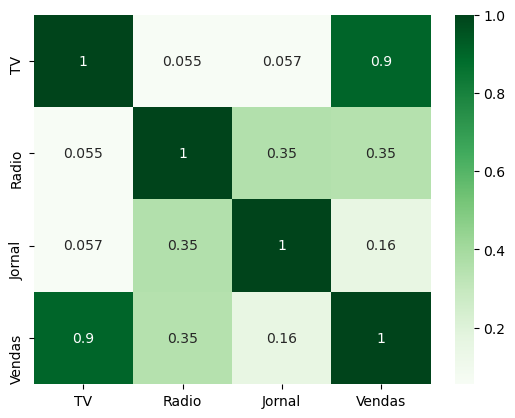

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
print(tabela.corr())
sns.heatmap((tabela.corr()), cmap = "Greens", annot = True)
plt.show()

In [5]:
y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]] #para pegar duas colunas são dois []

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y) 

### Importando e treinado a IA

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()


modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

RandomForestRegressor()

### Testando a verificando a precisão das previsão feita pelas IA's para esclher o modelo mais preciso

In [7]:
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressao_linear))
print(r2_score(y_teste, previsao_arvore_decisao))

0.9296854260965084
0.9810221685148663


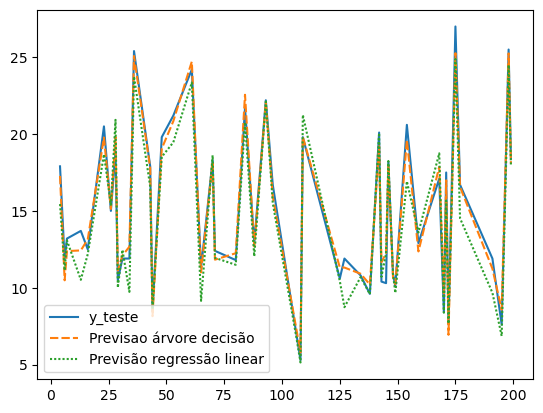

In [8]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao árvore decisão"] = previsao_arvore_decisao
tabela_auxiliar["Previsão regressão linear"] = previsao_regressao_linear

sns.lineplot(data=tabela_auxiliar)
plt.show()

In [9]:
nova_tabela = pd.read_csv("dados/novos.csv")
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


### Fazendo a previsão final com o modelo vencedor: Árvore de Decisão

In [10]:
previsao =  modelo_arvore_decisao.predict(nova_tabela) 
print(previsao) 

[ 7.45   8.905 19.859]


### Resultado: A televisão precisa do menor investimento com propaganda para receber o maior retorno. 